In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [49]:
df = pd.read_csv('./datasets/master_pima-indians-diabetes.csv')
df

,Pregnancies,GLucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [50]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [51]:
df.isna().sum()

Pregnancies                 0
GLucose                     0
BloodPressure               0
Skin Thickness              0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [53]:
X.head()

,Pregnancies,GLucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [54]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [56]:
X_train.head()

,Pregnancies,GLucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
681,0,162,76,36,0,49.6,0.364,26
538,0,127,80,37,210,36.3,0.804,23
433,2,139,75,0,0,25.6,0.167,29
217,6,125,68,30,120,30.0,0.464,32
375,12,140,82,43,325,39.2,0.528,58


In [57]:
std = StandardScaler()
X_std_train = std.fit_transform(X_train)
X_std_test = std.transform(X_test)

In [58]:
X_std_train_df = pd.DataFrame(X_std_train, columns=X.columns)
X_std_test_df = pd.DataFrame(X_std_test, columns=X.columns)

In [59]:
X_std_train_df

,Pregnancies,GLucose,BloodPressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.138304,1.267733,0.375739,0.949412,-0.682876,2.248285,-0.352703,-0.582085
1,-1.138304,0.194094,0.583814,1.012020,1.105051,0.543713,1.004710,-0.841572
2,-0.531604,0.562199,0.323720,-1.304460,-0.682876,-0.827634,-0.960454,-0.322598
3,0.681797,0.132744,-0.040412,0.573767,0.338797,-0.263716,-0.044200,-0.063111
4,2.501897,0.592875,0.687852,1.387665,2.084155,0.915386,0.153242,2.185776
...,...,...,...,...,...,...,...,...
609,-0.228254,1.605163,0.791890,0.761589,3.352732,0.466815,-0.679717,-0.928067
610,-0.228254,1.513136,-0.248487,1.012020,1.232761,0.313019,-0.377384,-0.236102
611,-0.834954,-0.910220,-0.768676,0.260729,0.168518,-0.878900,-0.753757,-0.841572
612,-1.138304,-1.063597,-0.040412,0.698982,-0.682876,0.479631,-0.741417,-0.668580


In [60]:
# Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_std_train, y_train)

In [61]:
# Models
rf = RandomForestClassifier()
svm = SVC()
nb = GaussianNB()

In [62]:
# Fit the Models
rf.fit(X_train_smote, y_train_smote)
svm.fit(X_train_smote, y_train_smote)
nb.fit(X_train_smote, y_train_smote)

GaussianNB()

In [63]:
y_rf = rf.predict(X_std_test)
y_svm = svm.predict(X_test)
y_nb = nb.predict(X_test)

C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [64]:
print("Accuracy of Random Forest:", accuracy_score(y_test, y_rf))
print("Accuracy of SVM:", accuracy_score(y_test, y_svm))
print("Accuracy of Naive Bayes:", accuracy_score(y_test, y_nb))

Accuracy of Random Forest: 0.8051948051948052
Accuracy of SVM: 0.6493506493506493
Accuracy of Naive Bayes: 0.35064935064935066


In [65]:
def evaluate_model(y_test, y_pred):
    print("Accuracy", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Accuracy:", recall_score(y_test, y_pred))
    print("Accuracy:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)


Random Forest:
Accuracy 0.8051948051948052
Precision: 0.7068965517241379
Accuracy: 0.7592592592592593
Accuracy: 0.7321428571428571
Confusion Matrix:
 [[83 17]
 [13 41]]



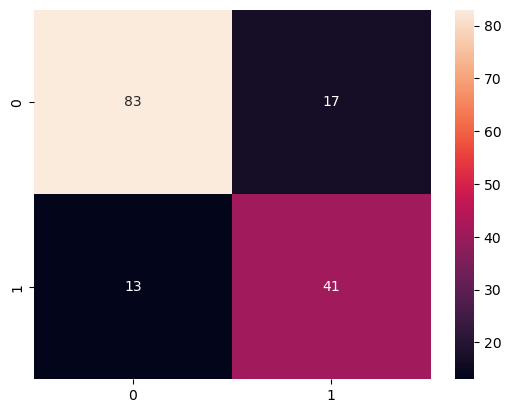

In [66]:
print("\nRandom Forest:")
evaluate_model(y_test, y_rf)


SVM:
Accuracy 0.6493506493506493
Precision: 0.0
Accuracy: 0.0
Accuracy: 0.0
Confusion Matrix:
 [[100   0]
 [ 54   0]]



C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


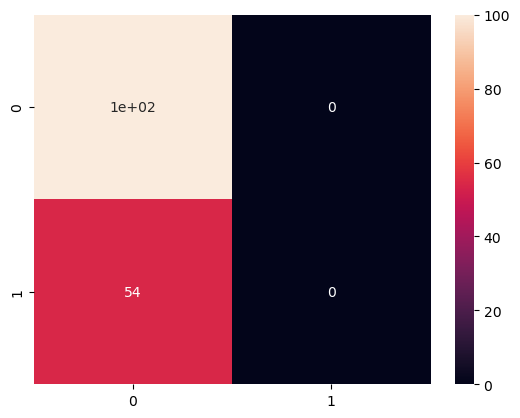

In [67]:
print("\nSVM:")
evaluate_model(y_test, y_svm)


Naive Bayes:
Accuracy 0.35064935064935066
Precision: 0.35064935064935066
Accuracy: 1.0
Accuracy: 0.5192307692307693
Confusion Matrix:
 [[  0 100]
 [  0  54]]



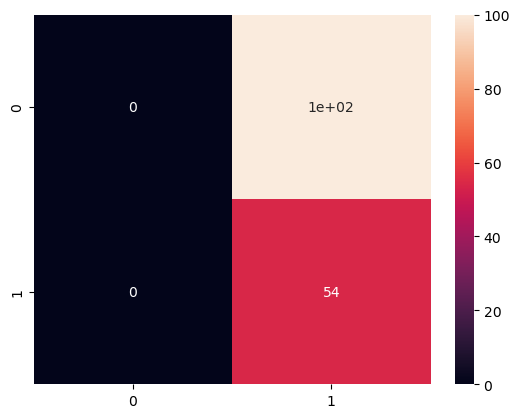

In [68]:
print("\nNaive Bayes:")
evaluate_model(y_test, y_nb)